In [1]:
import pandas as pd
from numpy import array, mean, save
import numpy as np

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
font = {'size'   : 12}
plt.rc('font', **font)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
dt=pd.read_csv('ROCStories/ROCStories__spring2016 - ROCStories_spring2016.csv')
dt.head(3)

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5
0,9a51198e-96f1-42c3-b09d-a3e1e067d803,Overweight Kid,Dan's parents were overweight.,Dan was overweight as well.,The doctors told his parents it was unhealthy.,His parents understood and decided to make a c...,They got themselves and Dan on a diet.
1,617e7ada-3878-488d-bd56-40695b91f053,The Bike Accident,Carrie had just learned how to ride a bike.,She didn't have a bike of her own.,Carrie would sneak rides on her sister's bike.,She got nervous on a hill and crashed into a w...,The bike frame bent and Carrie got a deep gash...
2,79b0da1f-e460-4173-ba58-8c9e2553c53a,Beach,Morgan enjoyed long walks on the beach.,She and her boyfriend decided to go for a long...,"After walking for over a mile, something happe...",Morgan decided to propose to her boyfriend.,Her boyfriend was upset he didn't propose to h...


In [4]:
import nltk
from nltk.tokenize import word_tokenize

# Pretrained word2vec

In [63]:
from gensim.models import Word2Vec, KeyedVectors
model = KeyedVectors.load_word2vec_format('/home/surov/Library/ML_models/GoogleNews-vectors-negative300.bin', binary=True, limit=100000)

In [5]:
'''def toW2V(dt,start,stop):
    vs = []
    for i in range(start,stop):
        s = dt.iloc[i][3]
        wds = word_tokenize(s.replace('.','').lower())

        vec = []
        for w in wds:
            if w in model.key_to_index:
                vec.append(model[w])
        if len(vec) > 0:
            vec = array(vec)
            vs.append(mean(vec, axis=0))

    vs = array(vs)
    return(vs)
    
arr = toW2V(dt, 0, len(dt))
arr.shape
'''

In [6]:

N = len(dt)
x, y = [], []
for n in range(N):
    for k in range(2,7):
        s = dt.iloc[n][k]
        wds = word_tokenize(s.replace('.','').lower())
        
        vec = []
        for w in wds:
            if w in model.key_to_index:
                vec.append(model[w])
        if len(vec) > 0:
            vec = array(vec)
            x.append(mean(vec, axis=0))
            y.append(k-2)
            
x = array(x)
y = array(y)
        
x.shape, y.shape

((227478, 300), (227478,))

In [28]:
save('x.npy', x)
save('y.npy', y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2024, test_size=0.25)
x_test.shape, y_test.shape

((56870, 300), (56870,))

# Word2vec + Logistic regression

In [8]:
%%time

m = LogisticRegression()
m.fit(x_train, y_train)
y_predict = m.predict(x_test)

CPU times: user 2min 44s, sys: 26.8 s, total: 3min 11s
Wall time: 16.3 s


/home/surov/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
conmat = confusion_matrix(y_test, y_predict)
print(conmat)

[[8657  805  544  432  873]
 [1568 5163 1677 1445 1461]
 [1472 3365 2147 2487 2014]
 [1242 2401 1815 3089 2883]
 [1219 1476  808 2087 5740]]


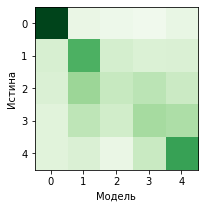

In [14]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     11311
           1       0.39      0.46      0.42     11314
           2       0.31      0.19      0.23     11485
           3       0.32      0.27      0.29     11430
           4       0.44      0.51      0.47     11330

    accuracy                           0.44     56870
   macro avg       0.42      0.44      0.42     56870
weighted avg       0.41      0.44      0.42     56870



### Точность на 2% выше чем при использовании Count Vectorizer (задание 1)

# Word2vec + K nearest neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn.fit(x_train, y_train)

y_preds_knn = knn.predict(x_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f70ca0b6ca0>
Traceback (most recent call last):
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [30]:
conmat = confusion_matrix(y_test, y_preds_knn)
print(conmat)

[[6434 1907  871  662 1437]
 [ 900 4740 2017 1451 2206]
 [ 626 3428 2457 2278 2696]
 [ 436 2459 2079 2599 3857]
 [ 454 1512 1048 1543 6773]]


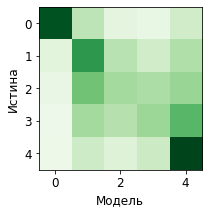

In [31]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

In [35]:
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64     11311
           1       0.34      0.42      0.37     11314
           2       0.29      0.21      0.25     11485
           3       0.30      0.23      0.26     11430
           4       0.40      0.60      0.48     11330

    accuracy                           0.40     56870
   macro avg       0.41      0.41      0.40     56870
weighted avg       0.41      0.40      0.40     56870



### Точность на 2-4% ниже чем у Logistic Regression

# Word2vec + LinearDiscriminantAnalysis + KNN

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
lda = LinearDiscriminantAnalysis(n_components=3);
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=3)

In [36]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(lda.transform(x_train), y_train)

y_preds_knn = knn.predict(lda.transform(x_test))

[[8481  844  553  549  884]
 [1623 4784 1947 1525 1435]
 [1468 3229 2364 2460 1964]
 [1194 2322 2237 2793 2884]
 [1213 1449 1202 2029 5437]]


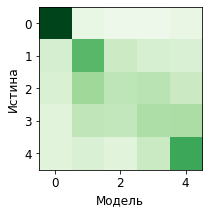

In [37]:
conmat = confusion_matrix(y_test, y_preds_knn)
print(conmat)
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

In [38]:
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67     11311
           1       0.38      0.42      0.40     11314
           2       0.28      0.21      0.24     11485
           3       0.30      0.24      0.27     11430
           4       0.43      0.48      0.45     11330

    accuracy                           0.42     56870
   macro avg       0.40      0.42      0.41     56870
weighted avg       0.40      0.42      0.41     56870



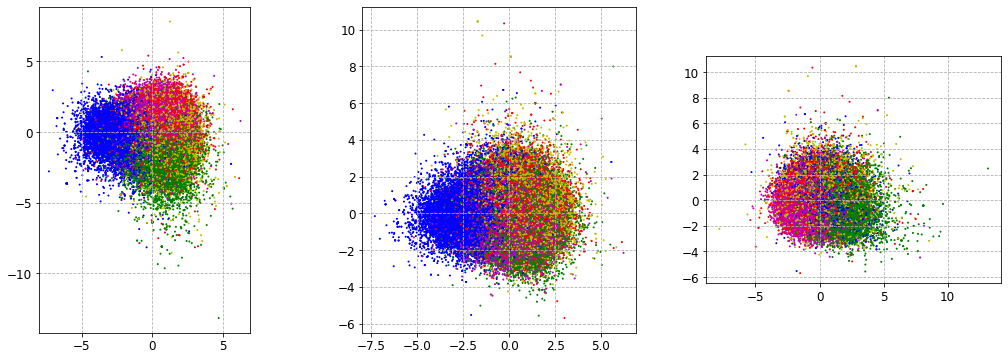

In [42]:
xdim3 = lda.transform(x)
# Окраска классов в порядке столбцов датафрейма.
cmap = mpl.colors.ListedColormap(['b','m','r','y','g'])
norm = mpl.colors.BoundaryNorm([0,1,2,3,4,5], 5)

fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].scatter(xdim3[:, 0], -xdim3[:, 1], c=y, s=1, cmap=cmap, norm=norm);
ax[1].scatter(xdim3[:, 0], -xdim3[:, 2], c=y, s=1, cmap=cmap, norm=norm);
ax[2].scatter(xdim3[:, 1], -xdim3[:, 2], c=y, s=1, cmap=cmap, norm=norm);

for a in ax: 
    a.grid(True, ls='--')
    a.set_aspect(1)

## Из первой картинки видно как три сдерних класса (фиолетовый, красный, жёлтый) сваливаются в кучу. Отсюда возникла идея их объединить и прийти к трёхклассовой классификации. Попробуем:

In [43]:
y

array([0, 1, 2, ..., 2, 3, 4])

In [44]:
def mapf(x):
    if x==0: return 0
    if x==1 or x == 2 or x == 3: return 1
    if x==4: return 2

In [45]:
y2=array(list(map(mapf, y)))
y2

array([0, 1, 1, ..., 1, 1, 2])

In [46]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, random_state=2024, test_size=0.25)
x2_test.shape, y2_test.shape

((56870, 300), (56870,))

# Logistic Regression

In [47]:
%%time

m = LogisticRegression()
m.fit(x2_train, y2_train)
y2_predict = m.predict(x2_test)

CPU times: user 2min 39s, sys: 25.2 s, total: 3min 4s
Wall time: 16 s


/home/surov/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
conmat = confusion_matrix(y2_test, y2_predict)
conmat

array([[ 7095,  3912,   304],
       [ 2092, 30575,  1562],
       [  673,  8157,  2500]])

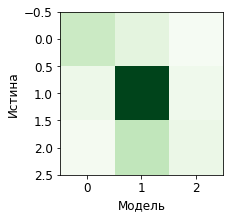

In [53]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

In [54]:
print(classification_report(y2_test, y2_predict))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     11311
           1       0.72      0.89      0.80     34229
           2       0.57      0.22      0.32     11330

    accuracy                           0.71     56870
   macro avg       0.67      0.58      0.59     56870
weighted avg       0.69      0.71      0.68     56870



# LDA + KNN

In [50]:
lda = LinearDiscriminantAnalysis(n_components=2);
lda.fit(x2_train, y2_train)

LinearDiscriminantAnalysis(n_components=2)

In [57]:
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(lda.transform(x2_train), y2_train)

y2_preds_knn = knn.predict(lda.transform(x2_test))

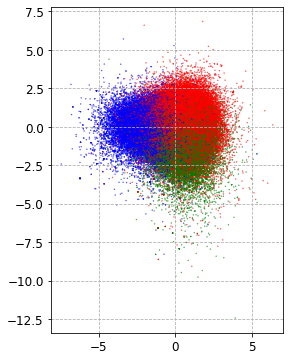

In [56]:
xdim3 = lda.transform(x)

cmap = mpl.colors.ListedColormap(['b','r','g'])
norm = mpl.colors.BoundaryNorm([0,1,2,3], 3)

fig, ax = plt.subplots(1,1,figsize=(18,6))
ax.scatter(xdim3[:, 0], -xdim3[:, 1], c=y2, s=0.1, cmap=cmap, norm=norm);

ax.grid(True, ls='--')
ax.set_aspect(1)

In [58]:
print(classification_report(y2_test, y2_preds_knn))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66     11311
           1       0.72      0.87      0.79     34229
           2       0.55      0.25      0.35     11330

    accuracy                           0.70     56870
   macro avg       0.66      0.59      0.60     56870
weighted avg       0.68      0.70      0.68     56870



In [ ]:
# Точность ожидаемо возросла

## Возможно мешает дисбаланс классов, т.к. объединённый втрое больше остальных. Уравняем:

In [59]:
from numpy import random

In [60]:
random.choice([0,1,2])

1

In [64]:
def mapf(x):
    if x==2: return 0
    if x==3 or x == 4 or x == 5: return 1
    if x==6: return 2

In [65]:
N = len(dt)
x, y = [], []
for n in range(N):
    
    k3 = random.choice([3,4,5])
    for k in [2,k3,6]:
        
        s = dt.iloc[n][k]
        wds = word_tokenize(s.replace('.','').lower())
        
        vec = []
        for w in wds:
            if w in model.key_to_index:
                vec.append(model[w])
        if len(vec) > 0:
            mvec = mean(array(vec), axis=0)
            x.append(mvec)
            y.append(mapf(k))
            
x = array(x)
y = array(y)
        
x.shape, y.shape

((136486, 300), (136486,))

In [106]:
save('x3.npy', x)
save('y3.npy', y)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2024, test_size=0.25)
x_test.shape, y_test.shape

((34122, 300), (34122,))

# Logistic Regression

In [67]:
m = LogisticRegression()
m.fit(x_train, y_train)
y_predict = m.predict(x_test)

/home/surov/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
conmat = confusion_matrix(y_test, y_predict)
conmat

array([[9094, 1252,  973],
       [1803, 6587, 3007],
       [1396, 3132, 6878]])

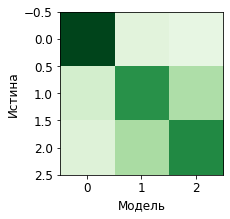

In [71]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

In [72]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     11319
           1       0.60      0.58      0.59     11397
           2       0.63      0.60      0.62     11406

    accuracy                           0.66     34122
   macro avg       0.66      0.66      0.66     34122
weighted avg       0.66      0.66      0.66     34122



# KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f70c8db2820>
Traceback (most recent call last):
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/surov/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [74]:
conmat = confusion_matrix(y_test, y_predict)
print(conmat)
print(classification_report(y_test, y_predict))

[[7034 2078 2207]
 [ 913 5489 4995]
 [ 544 2246 8616]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71     11319
           1       0.56      0.48      0.52     11397
           2       0.54      0.76      0.63     11406

    accuracy                           0.62     34122
   macro avg       0.64      0.62      0.62     34122
weighted avg       0.64      0.62      0.62     34122



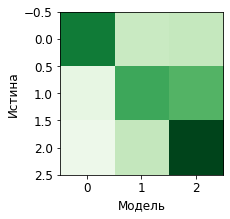

In [75]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

# LDA + KNN

In [76]:
lda = LinearDiscriminantAnalysis(n_components=2);
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [77]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(lda.transform(x_train), y_train)

y_predict = knn.predict(lda.transform(x_test))

In [78]:
conmat = confusion_matrix(y_test, y_predict)
print(conmat)
print(classification_report(y_test, y_predict))

[[8939 1341 1039]
 [1804 6395 3198]
 [1338 3160 6908]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     11319
           1       0.59      0.56      0.57     11397
           2       0.62      0.61      0.61     11406

    accuracy                           0.65     34122
   macro avg       0.65      0.65      0.65     34122
weighted avg       0.65      0.65      0.65     34122



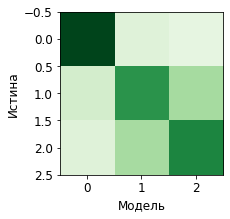

In [79]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow(conmat, cmap='Greens', vmin=0);
ax.set_ylabel('Истина')
ax.set_xlabel('Модель');

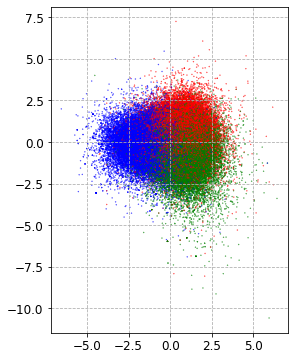

In [80]:
xdim3 = lda.transform(x)

cmap = mpl.colors.ListedColormap(['b','r','g'])
norm = mpl.colors.BoundaryNorm([0,1,2,3], 3)

fig, ax = plt.subplots(1,1,figsize=(18,6))
ax.scatter(xdim3[:, 0], -xdim3[:, 1], c=y, s=0.1, cmap=cmap, norm=norm);

ax.grid(True, ls='--')
ax.set_aspect(1)

## Неожиданно что в пониженной размерности KNN увеличивает точность. Лучший результат: Logistic Regression (0.66) и LDA+KNN (0.65)